In [1]:
!pip install citipy

    100% |████████████████████████████████| 563kB 518kB/s ta 0:00:01
  Running setup.py bdist_wheel for citipy ... - \ done
  Stored in directory: /Users/neilvodoor/Library/Caches/pip/wheels/68/ab/e8/bf9e7c2e7a41fd29026e52d88379ebc770f90eace3b616a420
Successfully built citipy


In [1]:
import matplotlib.pyplot as plt
from citipy import citipy as cp
import pandas as pd

In [2]:
citylist = []
count = 0
dup = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = cp.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(citylist) == 0:
            citylist.append(citdict)
            count+=1
            continue
        else:
            for city in citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citdict)
            count+=1
        else:
            dup = 'no'

print(len(citylist))

7957


In [3]:
print(citylist)

[{'city': 'vaini', 'country': 'to', 'lat': -90, 'long': -180}, {'city': 'mataura', 'country': 'pf', 'lat': -90, 'long': -168}, {'city': 'rikitea', 'country': 'pf', 'lat': -90, 'long': -141}, {'city': 'punta arenas', 'country': 'cl', 'lat': -90, 'long': -127}, {'city': 'ushuaia', 'country': 'ar', 'lat': -90, 'long': -92}, {'city': 'hermanus', 'country': 'za', 'lat': -90, 'long': -13}, {'city': 'bredasdorp', 'country': 'za', 'lat': -90, 'long': 12}, {'city': 'kruisfontein', 'country': 'za', 'lat': -90, 'long': 29}, {'city': 'port elizabeth', 'country': 'za', 'lat': -90, 'long': 31}, {'city': 'port alfred', 'country': 'za', 'lat': -90, 'long': 41}, {'city': 'east london', 'country': 'za', 'lat': -90, 'long': 60}, {'city': 'taolanaro', 'country': 'mg', 'lat': -90, 'long': 63}, {'city': 'busselton', 'country': 'au', 'lat': -90, 'long': 74}, {'city': 'albany', 'country': 'au', 'lat': -90, 'long': 87}, {'city': 'new norfolk', 'country': 'au', 'lat': -90, 'long': 119}, {'city': 'hobart', 'coun

In [4]:
import requests as req
import json

In [141]:
citypd = pd.DataFrame({
    'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],
})

citypd.head()

samplecity = citypd.sample(500)

In [142]:
samplecity

,city,country
1508,tari,pg
2766,tougan,bf
4852,chanute,us
4542,salamiyah,sy
6247,svit,sk
3122,that phanom,th
4245,anar darreh,af
2460,caramay,ph
5461,ingersoll,ca
4468,hirado,jp


In [143]:
apikey = 'Please Insert API Key here'
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0
samplecity['latitude'] = ""
samplecity['longitude'] = ""
samplecity['temperature'] = ""
samplecity['humidity'] = ""
samplecity['cloudiness'] = ""
samplecity['wind_speed'] = ""

for index,row in samplecity.iterrows():
    count+= 1
    query_url = url + "appid=" + apikey + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
#         print(cityweather)
        samplecity.set_value(index, "latitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "longitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "temperature", int(cityweather['main']['temp']))
        samplecity.set_value(index, "humidity", int(cityweather['main']['humidity']))
        samplecity.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        samplecity.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
    except:
        print("No data for this city: {row['city']}")
        samplecity.drop([index])
    print(f"This is city#: {count}")
    print(f"This is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")


This is city#: 1
This is: tari
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=tari
This is city#: 2
This is: tougan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=tougan
This is city#: 3
This is: chanute
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=chanute
This is city#: 4
This is: salamiyah
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=salamiyah
This is city#: 5
This is: svit
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=svit
This is city#: 6
This is: that phanom
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e

This is city#: 49
This is: lillooet
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=lillooet
This is city#: 50
This is: candawaga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=candawaga
This is city#: 51
This is: syedove
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=syedove
This is city#: 52
This is: tres lagoas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=tres lagoas
This is city#: 53
This is: rio claro
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=rio claro
This is city#: 54
This is: oyo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674c

This is city#: 96
This is: miyako
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=miyako
This is city#: 97
This is: sabya
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=sabya
This is city#: 98
This is: nobres
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=nobres
This is city#: 99
This is: safwah
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=safwah
This is city#: 100
This is: goulburn
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=goulburn
This is city#: 101
This is: qixingtai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486

This is: kaupanger
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=kaupanger
This is city#: 144
This is: atagay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=atagay
This is city#: 145
This is: blankenberge
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=blankenberge
This is city#: 146
This is: ranghulu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=ranghulu
This is city#: 147
This is: kembe
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=kembe
This is city#: 148
This is: colborne
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c4

This is city#: 190
This is: lahijan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=lahijan
This is city#: 191
This is: brcko
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=brcko
This is city#: 192
This is: woodward
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=woodward
This is city#: 193
This is: orcopampa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=orcopampa
This is city#: 194
This is: de aar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=de aar
This is city#: 195
This is: hungund
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64

This is city#: 237
This is: yasnyy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=yasnyy
This is city#: 238
This is: punta umbria
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=punta umbria
This is city#: 239
This is: pteleos
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=pteleos
This is city#: 240
This is: moreira sales
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=moreira sales
This is city#: 241
This is: mlonggo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=mlonggo
This is city#: 242
This is: madona
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?a

This is city#: 284
This is: esil
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=esil
This is city#: 285
This is: batsfjord
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=batsfjord
This is city#: 286
This is: phangnga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=phangnga
This is city#: 287
This is: tangshan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=tangshan
This is city#: 288
This is: wazzan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=wazzan
This is city#: 289
This is: kuroiso
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64

This is city#: 331
This is: martyush
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=martyush
This is city#: 332
This is: noormarkku
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=noormarkku
This is city#: 333
This is: svencioneliai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=svencioneliai
This is city#: 334
This is: san miguel
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=san miguel
This is city#: 335
This is: shaowu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=shaowu
This is city#: 336
This is: lumut
This is the requested URL: http://api.openweathermap.org/data/2.5/weathe

This is city#: 377
This is: raahe
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=raahe
This is city#: 378
This is: saraland
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=saraland
This is city#: 379
This is: kirovskaya
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=kirovskaya
This is city#: 380
This is: tubuala
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=tubuala
This is city#: 381
This is: yuksekova
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=yuksekova
This is city#: 382
This is: ferrol
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc

This is city#: 424
This is: rio blanco
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=rio blanco
This is city#: 425
This is: sigulda
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=sigulda
This is city#: 426
This is: puerto ayora
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=puerto ayora
This is city#: 427
This is: zangakatun
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=zangakatun
This is city#: 428
This is: inta
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=inta
This is city#: 429
This is: port pirie
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?a

This is city#: 471
This is: tagab
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=tagab
This is city#: 472
This is: point pleasant
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=point pleasant
This is city#: 473
This is: przasnysz
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=przasnysz
This is city#: 474
This is: valparaiso
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=valparaiso
This is city#: 475
This is: maraa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=af674cc1474d64a64479c486b1702f8e&units=Imperial&q=maraa
This is city#: 476
This is: puri
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=a

In [144]:
# print(len(samplecity))
type(samplecity['temperature'])
latitude = []
temperature = []
humidity = []
cloudy = []
windspeed = []

samplecity = samplecity[samplecity.latitude != ""]
samplecity.to_csv("sampleweather.csv", encoding="utf-8", index=False)

for index,row in samplecity.iterrows():
    latitude.append(row['latitude'])
    temperature.append(row['temperature'])
    humidity.append(row['humidity'])
    cloudy.append(row['cloudiness'])
    windspeed.append(row['wind_speed'])

# print(type(latitude[4]))
# print(latitude[4])
count = 0
index = 0
offend = []
for i in temperature:
    index += 1
    if type(i) != int:
        count += 1
        print(type(i))
        offend.append(index)
        print(i)

print(offend)
print(count)
# print(temperature[offend-1])
if count > 0:
    for i in offend:
        print(i)
        del temperature[i-1]
        del latitude[i-1]
        del humidity[i-1]
        del cloudy[i-1]
        del windspeed[i-1]

print(temperature)
print(len(temperature))

[]
0
[49, 72, 71, 65, 42, 88, 72, 85, 59, 91, 63, 77, 69, 75, 65, 85, 79, 63, 72, 68, 54, 75, 60, 71, 56, 69, 57, 75, 63, 68, 81, 89, 71, 72, 76, 39, 57, 88, 71, 62, 84, 68, 64, 45, 67, 55, 58, 80, 86, 82, 72, 70, 63, 70, 72, 51, 60, 87, 60, 75, 61, 60, 64, 78, 43, 66, 85, 70, 84, 59, 74, 71, 84, 57, 81, 54, 55, 89, 76, 45, 62, 66, 81, 73, 43, 61, 69, 80, 82, 80, 70, 71, 62, 58, 71, 91, 70, 95, 60, 87, 71, 48, 69, 55, 67, 80, 69, 52, 58, 68, 55, 68, 33, 63, 68, 66, 80, 50, 86, 72, 69, 67, 68, 84, 67, 69, 85, 73, 66, 45, 72, 59, 80, 86, 52, 64, 45, 85, 68, 64, 72, 42, 53, 59, 76, 67, 61, 41, 51, 63, 66, 76, 89, 71, 59, 67, 61, 54, 58, 60, 50, 57, 64, 59, 51, 60, 63, 64, 71, 75, 76, 71, 80, 34, 89, 57, 50, 68, 81, 52, 72, 68, 46, 47, 69, 74, 78, 76, 73, 46, 69, 13, 26, 77, 80, 74, 56, 68, 69, 57, 72, 55, 59, 79, 86, 69, 50, 69, 84, 75, 73, 63, 82, 81, 64, 51, 35, 61, 78, 56, 78, 77, 78, 84, 48, 67, 59, 79, 71, 70, 41, 69, 61, 66, 60, 67, 70, 64, 63, 86, 50, 61, 67, 68, 59, 62, 71, 73, 73

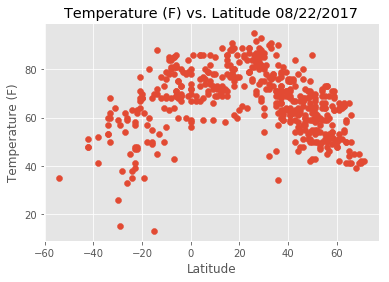

In [145]:
# import datetime
# date = datetime.date.today()
import time
date = time.strftime("%m/%d/%Y")
# print(date)
# plt.scatter(latitude, temperature)
plt.scatter(samplecity['latitude'],samplecity['temperature'])
plt.title(f"Temperature (F) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature.png")
plt.show()

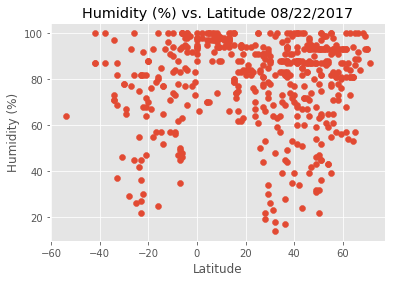

In [146]:
# plt.scatter(latitude,humidity)
plt.scatter(samplecity['latitude'], samplecity['humidity'])
plt.title(f"Humidity (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity.png")
plt.show()

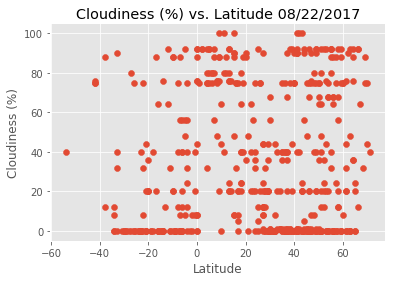

In [147]:
# plt.scatter(latitude,cloudy)
plt.scatter(samplecity['latitude'], samplecity['cloudiness'])
plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness.png")
plt.show()

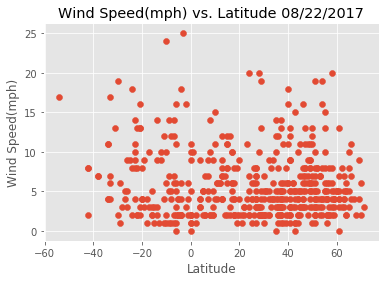

In [148]:
# plt.scatter(latitude,windspeed)
plt.scatter(samplecity['latitude'], samplecity['wind_speed'])
plt.title(f"Wind Speed(mph) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.style.use('ggplot')
plt.savefig("Wind_Speed.png")
plt.show()

In [149]:
# samplecity = samplecity[samplecity.latitude != ""]
#above works to remove blank answers
# samplecity.to_csv("sampleweather.csv", encoding="utf-8", index=False)
df = pd.read_csv("sampleweather.csv")
df.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,tari,pg,58,58,49,78,56,3
1,tougan,bf,13,13,72,98,92,4
2,chanute,us,37,37,71,88,1,4
3,salamiyah,sy,35,35,65,96,0,10
4,svit,sk,49,49,42,93,20,6
